In [4]:
import torch
import numpy as np
from datasets import *
from models import MUnet,Unet
import torch.nn.functional as F
from utils import onehot2mask
import matplotlib.pyplot as plt
model = Unet(1,4)
# load state dict
model.load_state_dict(torch.load('output/seg/best_dice.pth'))
model.eval()
k=2

In [9]:
import SimpleITK as sitk
index = 45
labelroot = 'datasets/test/C0LET2_gt_for_challenge19/LGE_manual_35_TestData/patient'+str(index) +'_LGE_manual.nii.gz'
imageroot = 'datasets/train/all_image/patient' + str(index) +'_LGE.nii.gz'
image = sitk.ReadImage(imageroot)
image = sitk.GetArrayFromImage(image)
label = sitk.ReadImage(labelroot)
label = sitk.GetArrayFromImage(label)

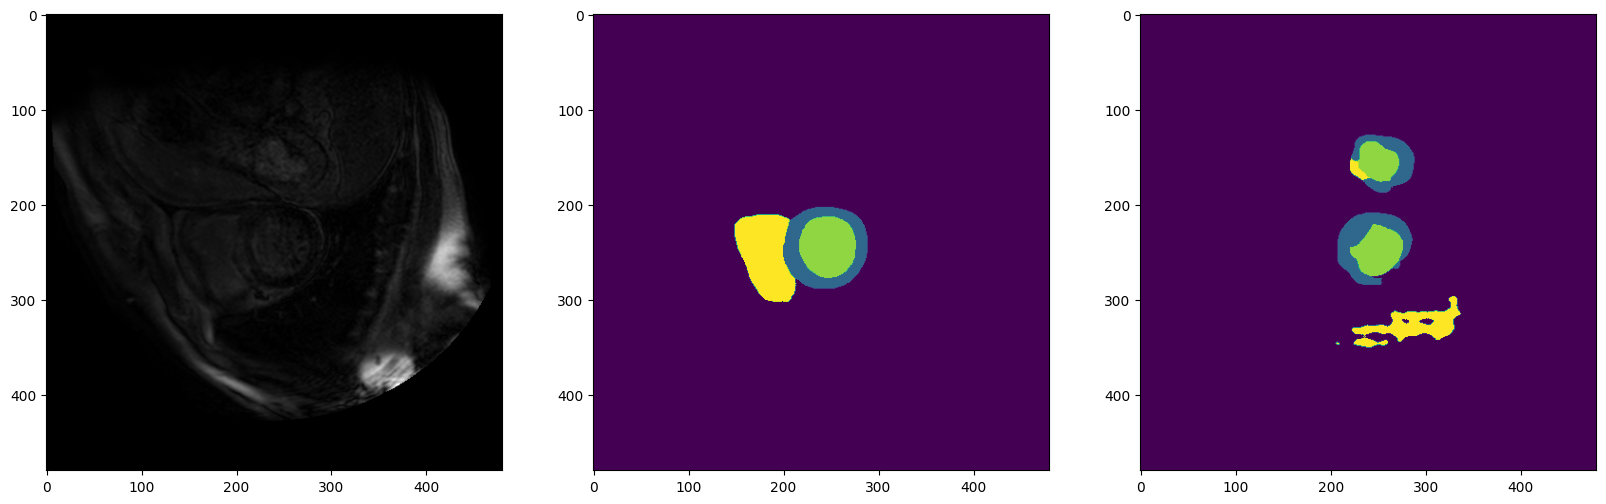

In [14]:
import matplotlib.pyplot as plt
slice = 10
input_ = image[slice,:,:]
input = torch.tensor(input_).unsqueeze(dim=0)
input = minmax_normal(input).unsqueeze(dim=0)
target = label[slice,:,:]
predict = model(input)
output = F.softmax(predict.detach(),dim=1).squeeze(dim=0)
remark = [[0.0],[200.0],[500.0],[600.0]]
label_ = onehot2mask(output,remark)
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(input_,cmap='gray')
plt.subplot(1,3,2)
plt.imshow(target)
plt.subplot(1,3,3)
plt.imshow(label_)

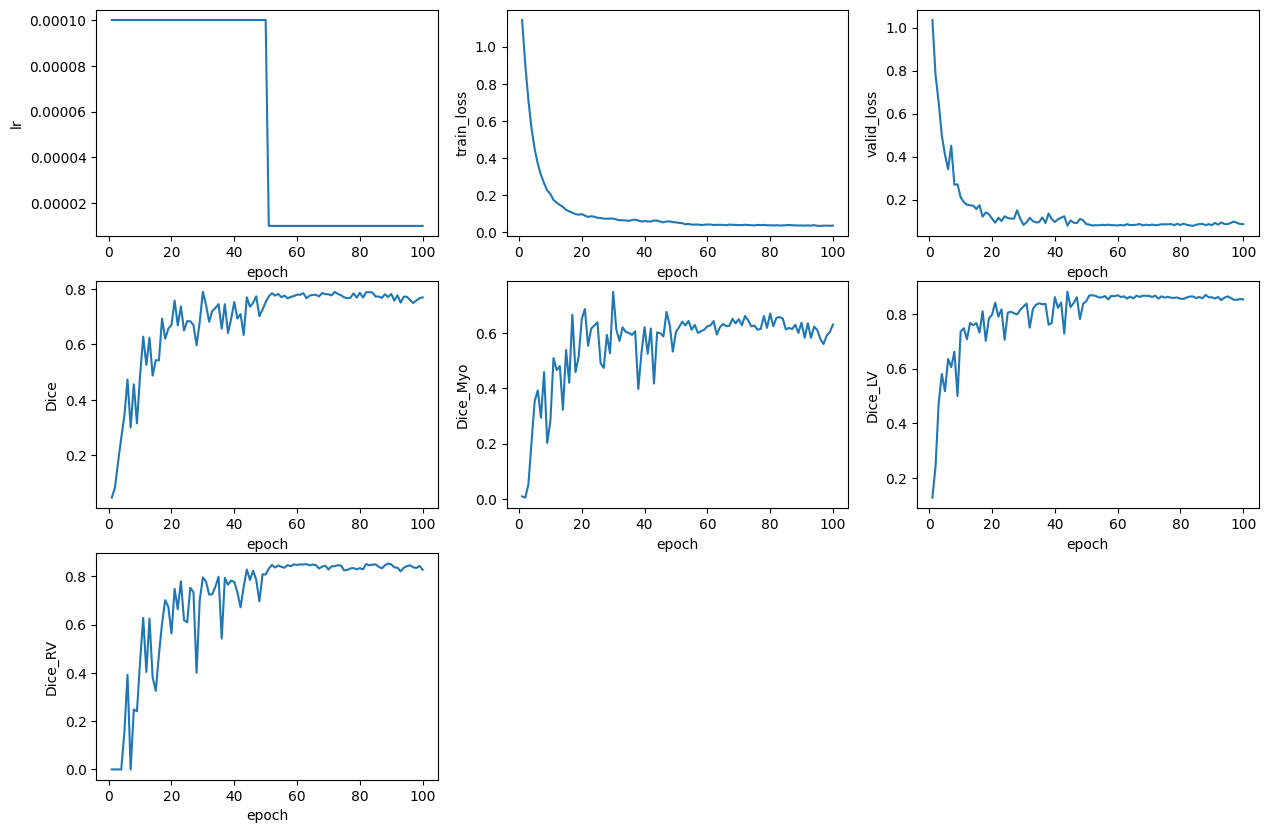

In [3]:
# 查看segmentation任务的情况
import matplotlib.pyplot as plt
import pandas as pd
import math
loss = pd.read_csv('output/seg/loss.csv')
x = loss['epoch'].tolist()
lens = len(loss.columns.tolist()) - 1
x_dim = math.ceil(lens/3)
plt.figure(figsize=(15,10))
for i in range(1,lens+1):
    label = loss.columns.tolist()[i]
    loss_ = loss[label].tolist()
    axis = plt.subplot(x_dim,3,i)
    axis.set_xlabel('epoch')
    axis.set_ylabel(label)
    axis.plot(x,loss_)
plt.show()